#### 시계열데이터 
- type
    - 년도 표시(4자리수) : %Y
    - 년도 표시(2자리수) : %y
    - 월을 숫자로 표시 : %m
    - 월의 이름을 표시 : %B
    - 월의 이름을 축약해서 표시 : %b
    - 일을 숫자로 표시 : %d
    - 시를 24시 기준으로 표시 : %H
    - 시를 12시 기준으로 표시 : %I
    - AM/PM을 표시 : %p
    - 분을 숫자로 표시 : %M
    - 초를 숫자로 표시 : %S
    - 요일을 이름으로 표시 : %A
    - 요일을 숫자로 표시 : %w ( 0 : 일, ... , 6 : 토 )

In [ ]:
from datetime import datetime

In [ ]:
time_text = "2025-03-07"

In [ ]:
type(time_text)

In [ ]:
# 문자열 데이터를 시계열 데이터로 변경
time_data = datetime.strptime(time_text, '%Y-%m-%d')
print(time_data)
print(time_text)

In [ ]:
print(type(time_data))

In [ ]:
# 시계열 데이터를 문자열 데이터로 변경
time_data.strftime('%y/%m/%d')

In [ ]:
time_data.strftime('%m월')

In [ ]:
time_data.strftime('%w')

In [ ]:
time_data.strftime('%a')

In [ ]:
import pandas as pd

In [ ]:
# pandas에서 제공하는 시계열 데이터 
pd.Timestamp(100000)    # 나노초 단위로 시간을 구한다. 

In [ ]:
pd.Timestamp(100, unit='D')

In [ ]:
pd.Timestamp('98-03-07')

In [ ]:
pd.Timestamp("2016-01")

In [ ]:
time_data2 = pd.to_datetime('2025년 03월 07일', format="%Y년 %m월 %d일")

In [ ]:
time_data3 = pd.Timestamp(1, unit='D')

In [ ]:
time_data2 - time_data3

In [ ]:
pd.Timedelta("3 days")

In [ ]:
time_data2 - pd.Timedelta('3 days')

In [ ]:
time_data2 - pd.Timedelta(days= 30)

In [ ]:
corona = pd.read_csv("../../csv/corona.csv")

In [ ]:
corona.head()

In [ ]:
# 요일별 평균 일일 확진자의 수가 가장 큰 요일은 언제인가?
# 사용할 컬럼들만 추출하여 변수에 저장
df = corona[ ['stateDt', 'decideCnt'] ]

In [ ]:
df.head()

In [ ]:
# 일일확진자 컬럼을 생성
df2 = df.copy()

In [ ]:
df2.sort_values('stateDt', inplace=True)

In [ ]:
df2.reset_index(drop=True, inplace=True)

In [ ]:
df2['일일확진자'] =\
    (df2['decideCnt'] - df2['decideCnt'].shift()).fillna(0)

In [ ]:
df2.describe()

In [ ]:
df2.loc[ df2['일일확진자'] < 0 ]

In [ ]:
# 기준일 데이터가 내림차순일때
df['일일확진자'] = df['decideCnt'].diff(-1).fillna(0)

In [ ]:
df2['일일확진자'].describe()

In [ ]:
df['일일확진자'].describe()

In [ ]:
df['stateDt'].head(2)

In [ ]:
# 기준일 데이터를 시계열 데이터로 변경 
# df.info()
df['stateDt'] =\
    pd.to_datetime(df['stateDt'], format="%Y%m%d")


In [ ]:
df.info()

In [ ]:
# 반복문을 이용해서 시계열데이터의 요일을 출력하는 방법 
week_list = []
# for i in range( len(df) ):
for i in df.index:
    week_data = datetime.strftime(df.loc[i, 'stateDt'], '%w')
    week_list.append(week_data)
print(week_list)

In [ ]:
# map() , lambda()
list1 = [10, 20, 30, 40]

# for i in list1:
#     print(i)
list(map(
    lambda x : x**2, 
    list1
))

In [ ]:
# list1 데이터에서 값이 25 미만이면 'a' 25이상이면 'b' 변경하는 방법 
res = []
for i in list1:
    # i : list1의 각 원소들 대입
    if i < 25 :
        res.append('a')
    else:
        res.append('b')
res

In [ ]:
# 일반함수 + map
def func_1(x):
    if x < 25 :
        return 'a'
    else:
        return 'b'

list(
    map(
        func_1, 
        list1
    )
)

In [ ]:
# 참일경우 값 if 조건식 else 거짓일경우 값
list(
    map(
        lambda x : 'a' if x < 25 else 'b', 
        list1
    )
)

In [ ]:
df['요일'] = df['stateDt'].map(
    lambda x : x.strftime('%w')
)

In [ ]:
df.head()

In [102]:
df.loc[0, '요일']

'3'

In [ ]:
# 요일 컬럼의 데이터를 숫자형태에서 문자형태(월, ..., 일)변경
# for
week_list = []
# for i in range(df):
for i in df.index:
    # 요일 컬럼의 데이터가 0이라면 일 1이라면 월, .... 6이라면 토
    if df.loc[i, '요일'] == '0':
        week_list.append('일')
    elif df.loc[i, "요일"] == '1':
        week_list.append('월')
    elif df.loc[i, '요일'] == '2':
        week_list.append('화')
    elif df.loc[i, '요일'] == '3':
        week_list.append('수')
    elif df.loc[i, '요일'] == '4':
        week_list.append('목')
    elif df.loc[i, '요일'] == '5':
        week_list.append('금')
    else:
        week_list.append('토')
print(week_list)

# while
# 딕셔너리 생성 
dict_week = {
    '0' : '일', 
    '1' : '월', 
    '2' : '화', 
    '3' : '수', 
    '4' : '목', 
    '5' : '금', 
    '6' : '토'
}
# 초기값 생성 
i = 0
week_list2 = []
while i < len(df):
    # dict_week 데이터에서 필요한 키값을 df의 요일 컬럼에서 추출
    dict_key = df.iloc[i, -1]
    week_list2.append( dict_week[dict_key] )
    i += 1
print(week_list2)

# print(week_list == week_list2)
# map + 일반함수
def change_week(x):
    # x에 들어오는 데이터는? -> df의 요일 컬럼의 데이터 하나씩 대입
    return dict_week[x]

print(df['요일'].map(change_week))
# map + lambda
week_list = ['일', '월', '화', '수', '목', '금', '토']
df['요일'].map(
    lambda x : week_list[int(x)]
)



In [ ]:
df['요일'] = df['요일'].map(
    lambda x : week_list[int(x)]
)


In [112]:
# 특정 인덱스를 제거 
df.drop(819, axis=0, inplace = True)

C:\Users\moons\AppData\Local\Temp\ipykernel_14088\4076322166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(819, axis=0, inplace = True)


In [114]:
# 요일을 기준으로 그룹화 일일확진자의 평균을 출력해서 
# 값을 기준으로 내림차순 정렬 
group_data = df.groupby('요일')[ [ '일일확진자' ] ].mean()

In [116]:
group_data.sort_values('일일확진자', ascending=False, inplace=True)

In [117]:
import matplotlib.pyplot as plt

In [121]:
# 폰트 설정 
import platform

In [122]:
platform.system()

'Windows'

In [123]:
# 만약에 os가 mac이라면
if platform.system() == 'Darwin':
    plt.rc('font', family= 'AppleGothic')
else:
    plt.rc('font', family= 'Malgun Gothic')

<AxesSubplot: xlabel='요일'>

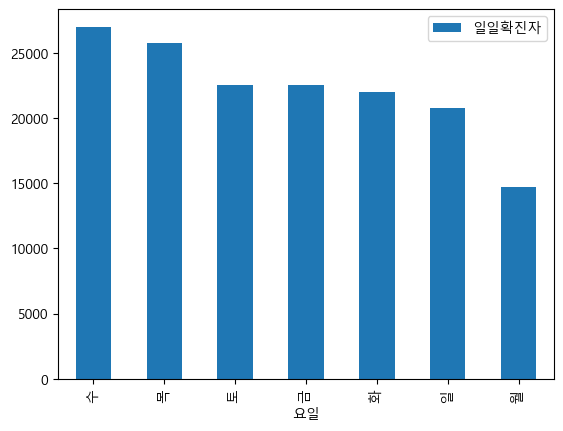

In [124]:
# 그래프 시각화 과정에서 한글이 출력에서 문제 발생 
group_data.plot(kind='bar')